In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sbn
sbn.set()

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,Ashes of Kukulcan,2016
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,The 86,2015


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### What are the ten most common movie names of all time?

In [5]:
titles.title.value_counts().head(10)

Hamlet                  19
Carmen                  14
Macbeth                 14
The Three Musketeers    12
Blood Money             11
The Outsider            11
She                     11
Maya                    11
Othello                 10
Honeymoon               10
dtype: int64

### Which three years of the 1930s saw the most films released?

In [6]:
titles[titles.year//10 == 193].year.value_counts().head(3)

1937    1186
1936    1130
1938    1117
dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

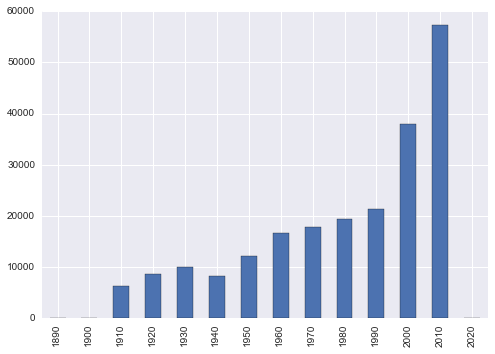

In [7]:
titles['decade'] = titles.year // 10 * 10
titles.decade.value_counts()
titles.decade.value_counts().sort_index()
titles.decade.value_counts().sort_index().plot(kind='bar')

### Plot the number of "Hamlet" films made each decade.

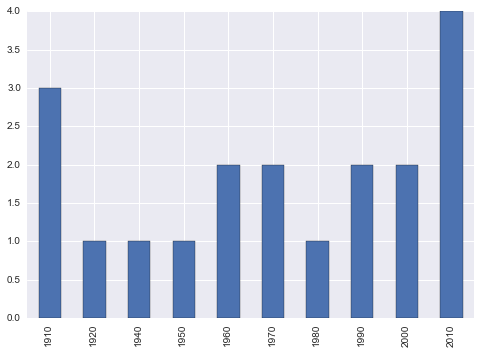

In [8]:
titles['decade'] = titles.year // 10 * 10
titles[titles.title == "Hamlet"].decade.value_counts().sort_index().plot("bar")


### Plot the number of "Rustler" characters in each decade of the history of film.

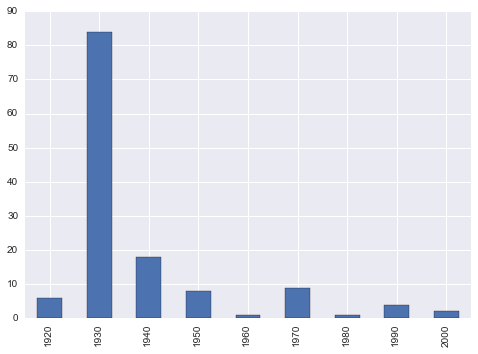

In [9]:
cast['decade'] = cast.year // 10 * 10
cast[cast.character == "Rustler"].decade.value_counts().sort_index().plot("bar")


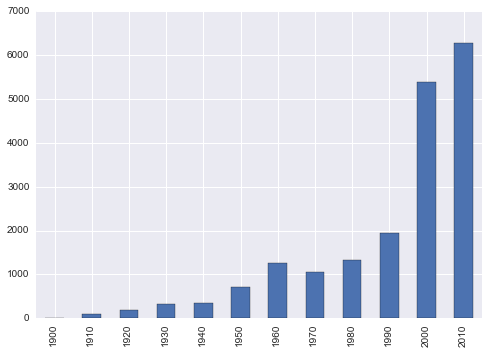

In [10]:
cast['decade'] = cast.year // 10 * 10
cast[cast.character == "Himself"].decade.value_counts().sort_index().plot("bar")


### Plot the number of "Hamlet" characters each decade.

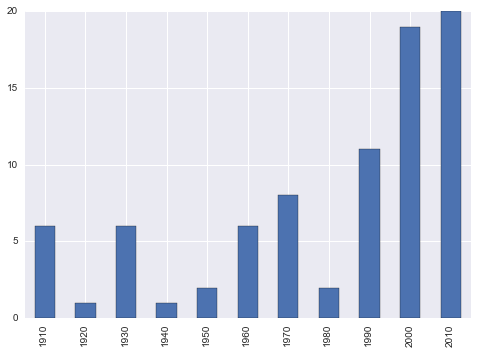

In [11]:
cast['decade'] = cast.year // 10 * 10
cast[cast.character == "Hamlet"].decade.value_counts().sort_index().plot("bar")


### What are the 11 most common character names in movie history?

In [12]:
cast.character.value_counts().head(11)

Himself        18916
Dancer         11076
Extra           9158
Reporter        7655
Doctor          6850
Policeman       6506
Student         6377
Bartender       6183
Nurse           6171
Party Guest     5923
Minor Role      5920
dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [14]:
c = cast[cast.character == "Herself"]
c.name.value_counts().head(10)

Joyce Brothers         14
Queen Elizabeth II     11
Margaret Thatcher       8
Mary Jo Pehl            7
Joan Rivers             7
Lili?n Garc?a           6
Bunny Yeager            5
Juhi Chawla             5
Sally Jessy Raphael     5
Caroline Rhea           5
dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [15]:
c = cast[cast.character == "Himself"]
c.name.value_counts().head(10)

Adolf Hitler             93
Richard Nixon            39
Ronald Reagan            31
John F. Kennedy          26
Ron Jeremy               24
Franklin D. Roosevelt    20
Winston Churchill        20
Bill Clinton             20
George W. Bush           20
Martin Luther King       19
dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [16]:
c = cast[cast.year == 1945]
c.name.value_counts().head()

Emmett Vogan       39
Sam (II) Harris    30
Bess Flowers       28
Harold Miller      28
Nolan Leary        27
dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [17]:
c = cast[cast.year == 1985]
c.name.value_counts().head()

Shakti Kapoor    19
Mammootty        19
Sukumari         17
Lou Scheimer     15
Aruna Irani      14
dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

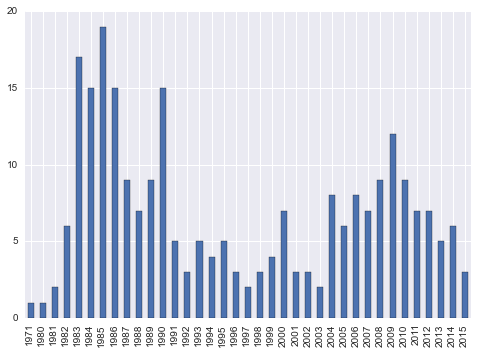

In [19]:
cast[cast.name == "Mammootty"].year.value_counts().sort_index()#.plot("bar")
cast[cast.name == "Mammootty"].year.value_counts().sort_index().plot("bar")

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [22]:
cast[cast.character.str.startswith("Patron In")].character.value_counts()

Patron In Chaps         1
Patron In Restaurant    1
Patron In The Bar       1
dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [24]:
c = cast[cast.character.str.startswith("Science")]
c.character.value_counts().head(10)

Science Teacher         54
Science Student          8
Science Fair Student     8
Science Reporter         5
Science Club Member      5
Science Promo Cadet      4
Science Fair Judge       4
Science Kid              4
Science teacher          3
Science Fair Teacher     3
dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

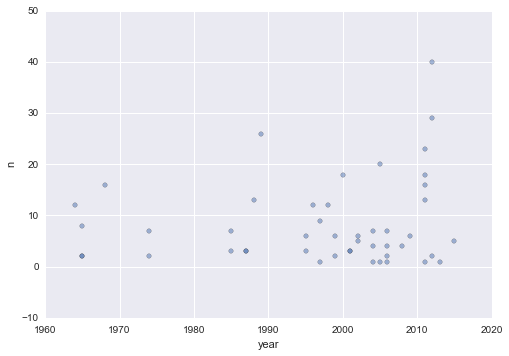

In [25]:
c = cast[cast.name == "Judi Dench"]
#c.n.value_counts().sort_index().plot(kind='bar')
c.plot(kind="scatter",x='year',y='n', alpha = 0.5)

In [26]:
c = cast[cast.name == "Judi Dench"]
d = c.groupby(['year','n']).size()
d = d.unstack('n')
d.fillna(' ', inplace = True)
d


n,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,12.0,13.0,16.0,18.0,20.0,23.0,26.0,29.0,40.0
year,,,,,,,,,,,,,,,,,,
1964,,,,,,,,,,1,,,,,,,,
1965,,2,,,,,,1,,,,,,,,,,
1968,,,,,,,,,,,,1,,,,,,
1974,,1,,,,,1,,,,,,,,,,,
1985,,,1,,,,1,,,,,,,,,,,
1987,,,2,,,,,,,,,,,,,,,
1988,,,,,,,,,,,1,,,,,,,
1989,,,,,,,,,,,,,,,,1,,
1995,,,1,,,1,,,,,,,,,,,,


### Plot the n-values of Cary Grant's roles through his career.

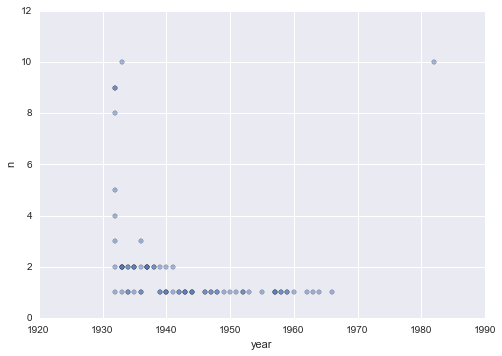

In [27]:
c = cast[cast.name == "Cary Grant"]
c.plot(kind="scatter",x='year',y='n', alpha = 0.5)

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

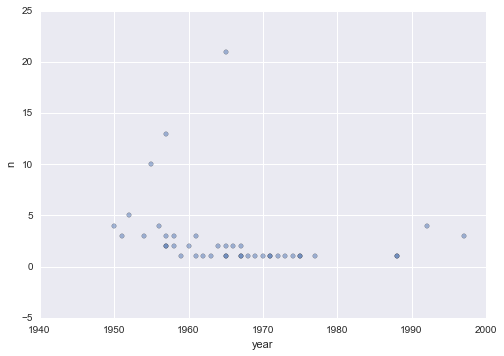

In [28]:
c = cast[cast.name == "Sidney Poitier"]
c.plot(kind="scatter",x='year',y='n', alpha = 0.5)

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [29]:
c = cast[cast.year // 10 == 195]
actors = c[c.type == 'actor']
actresses = c[c.type == "actress"]
print("Actresses: ",len(actresses[actresses.n == 1].n), "  Actors:  ",len(actors[actors.n == 1].n))

Actresses:  2813   Actors:   6389


### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [30]:
c = cast[cast.year // 10 == 195]
actors = c[c.type == 'actor']
actresses = c[c.type == "actress"]
print("Actresses: ",len(actresses[actresses.n == 2].n), "  Actors:  ",len(actors[actors.n == 2].n))

Actresses:  4405   Actors:   4382
